In [98]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import spaxcreate as sp
import h5py

import matplotlib as mpl
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16
mpl.rcParams['text.usetex'] = True

# General statement

We want to simulate a field $\phi(x,t)$ in a realm $L$ with periodic boundary conditions, expanding Universe with $R=R(\tau)$.

- We create a IC set with the correct Universe, $L$ and initial time, etc... and any IC
- We change the fields as shown in this notebook

Recall jaxions evolves conformal fields $\Phi = R \phi(x,\tau)$, $\Phi' = R' \phi+R\phi'$.


# Example

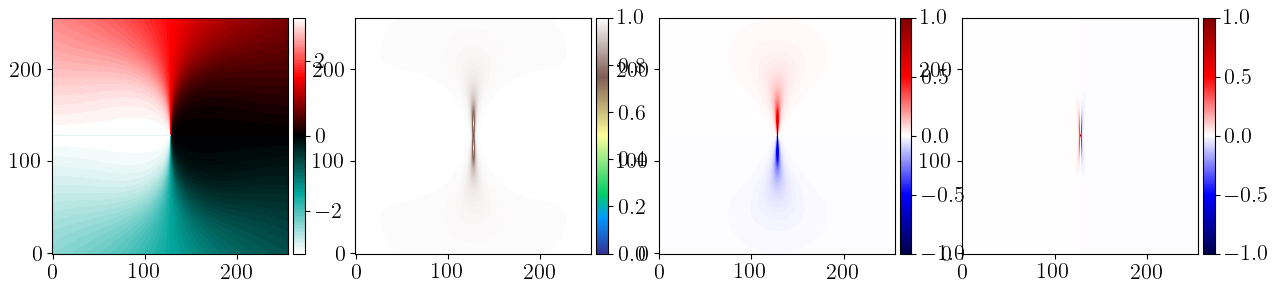

In [524]:
comb=bsgen(256,[128.01],
           [128.01],[30],angle_l=[0],adv_l=[0],r0_l=[30],
           msa=0.1,charge_l=[1])

N=256, Nz=4, R=1.00, Frw=0.00 $	au$=0.50 
N=256, Nz=4, R=1.00, Frw=0.00 $	au$=0.50 


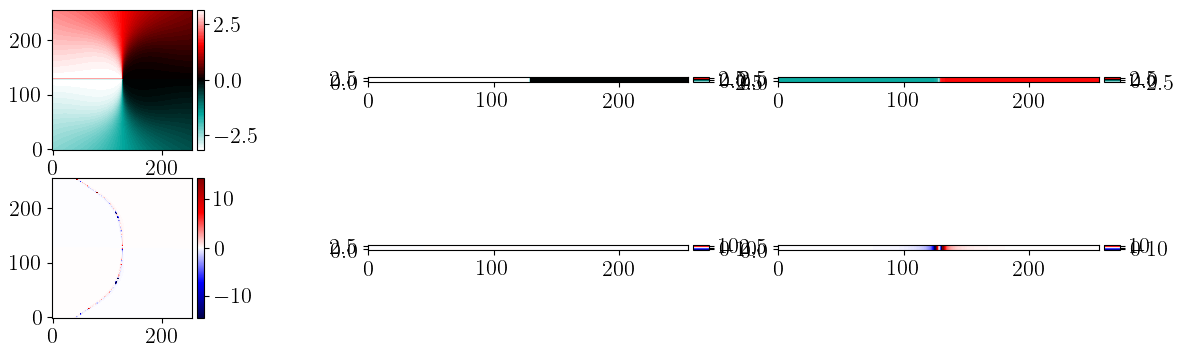

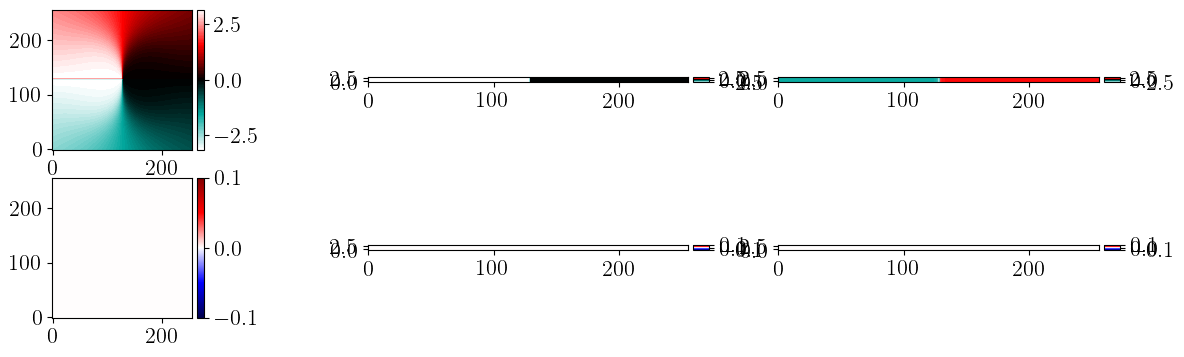

In [525]:
rewritemv('out/m/axion.00000',comb[0],comb[1],comb[2],comb[3],p=True)
rewritemv('out/m/axion.00000',comb[0],comb[1],comb[2],comb[3],p=True,write=False)

# Examples and development

# Lazy strategy, create a file with the right time/dimension/etc... and change fields

f1 = h5py.File(file_name, 'r+')     # open the file

data = f1['meas/frame1/data']       # load the data

data[...] = X1                      # assign new values to data

f1.close()   

In [76]:
f1 = h5py.File('out/m/axion.00000', 'r+')     # open the file

In [77]:
print([a for a in f1.keys()])
print([a for a in f1['/'].attrs.keys()])

['ic', 'm', 'potential', 'v']
['Axion mass', 'Current step', 'Depth', 'Field type', 'Frw', 'Physical size', 'Precision', 'R', 'Saxion mass', 'Size', 'nSteps', 'z', 'zFinal', 'zInitial']


In [78]:
# complex conformal field 
m = f1['m']
N  = f1['/'].attrs['Size']
Nz = f1['/'].attrs['Depth']
a = np.reshape(m,(N,N,Nz,2))
# conformal derivative
v = f1['v']
b = np.reshape(m,(N,N,Nz,2))

In [79]:
q = np.arctan2(a[:,:,:,1],a[:,:,:,0])

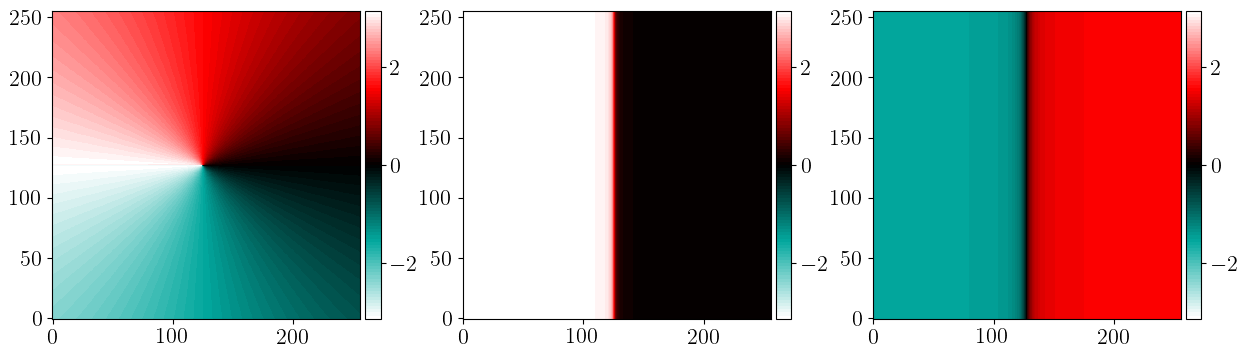

In [80]:
sz,sy,sx=Nz//2,N//2,N//2
fig, ax = plt.subplots(1,3,figsize=(15,4))
im = ax[0].imshow(q[sz,:,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[1].imshow(q[:,sy,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[2].imshow(q[:,:,sx],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)

In [81]:
# Create a new configuration

# Example, straight string centered at N//2,N//2
al = np.arange(0, N)
xv, yv = np.meshgrid(al, al)

cx,cy=125,127
q_slice = np.arctan2((yv-cy),(xv-cx))
for i in al:
    q[al,:,:] = q_slice
    
a[:,:,:,1] = np.sin(q)
a[:,:,:,0] = np.cos(q)

In [92]:
# Another example... Onion 
al = np.arange(0, N)
al2= np.arange(0, Nz)
cx,cy,cz=N/2,N/2,Nz/2
xv, yv, zv = np.meshgrid(al, al, al2)
q = 12*np.pi*np.exp(- ((xv-cx)**2+ (yv-cy)**2+ (zv-cz)**2)/(2*(N/12)**2))

a[:,:,:,1] = np.sin(q)
a[:,:,:,0] = np.cos(q)

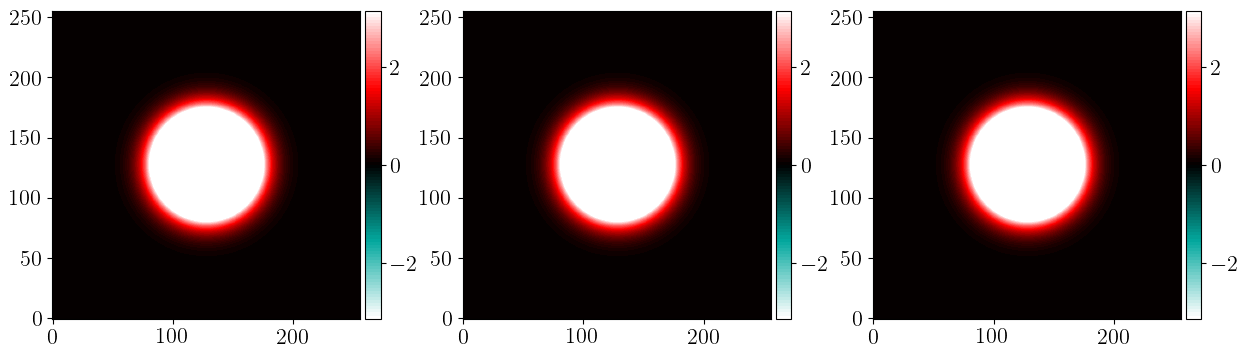

In [91]:
sz,sy,sx=Nz//2,N//2,N//2
fig, ax = plt.subplots(1,3,figsize=(15,4))
im = ax[0].imshow(q[sz,:,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[1].imshow(q[:,sy,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[2].imshow(q[:,:,sx],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)

In [94]:
# recall cf = phi*ct
ct = f1['/'].attrs['z']
# cv = phi'ct+phi

In [95]:
# set on disk
r = np.reshape(a,N*N*Nz*2)
m[...] = r*ct
v[...] = r*ct

In [96]:
f1.close()

# Check

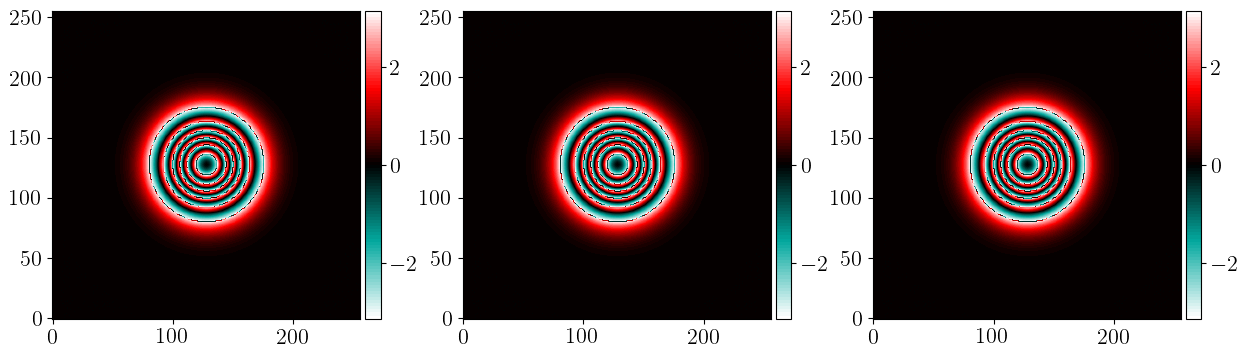

In [97]:
f1 = h5py.File('out/m/axion.00000', 'r+')     # open the file
m = f1['m']
N  = f1['/'].attrs['Size']
Nz = f1['/'].attrs['Depth']
a = np.reshape(m,(N,N,Nz,2))
K = np.arctan2(a[:,:,:,1],a[:,:,:,0])
sz,sy,sx=Nz//2,N//2,N//2
fig, ax = plt.subplots(1,3,figsize=(15,4))
im = ax[0].imshow(K[sz,:,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[1].imshow(K[:,sy,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
im = ax[2].imshow(K[:,:,sx],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
pa.colorbar(im)
f1.close()

# Boosted string

A string along z is $\phi = e^{i\arctan\frac{y-y_c}{x-x_c}}$

I can put a few of them 

A boosted string is more tricky

$\phi'(x')=\phi(x)$

$(t',x')=[\gamma(t-x\beta),\gamma(x-t\beta),y,z]$

$\phi'(x')=\frac{f(r')}{r'}[x'-x_c',y'-y_c']=f(r')e^{i \arctan(y/x)}$ $r'^2=(x'-x_c')^2+(y'-y_c')^2$

$\phi(x)=\frac{f(r')}{r'}[x',y]$

$\partial_t\phi(x)=(-\beta \gamma)\partial_{x'}\phi(x)=
(-\beta \gamma)[g'\frac{x'}{r'}(x',y)+g(1,0)]$

where $g(r')=f(r')/r'$. 

This allows to calculate a boosted string and put into the grid

## Rotated boost



/var/folders/s7/y9_9g78d2zn45s7t0lzfywv00000gn/T/ipykernel_58767/2518322412.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ax[0].plot(sss,1-1/(sss**2),':')
/var/folders/s7/y9_9g78d2zn45s7t0lzfywv00000gn/T/ipykernel_58767/2518322412.py:17: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(sss,0.43*sss/sss,'--')
/var/folders/s7/y9_9g78d2zn45s7t0lzfywv00000gn/T/ipykernel_58767/2518322412.py:20: RuntimeWarning: invalid value encountered in true_divide
  ax[1].semilogy(sss,0.43*sss/sss)
/var/folders/s7/y9_9g78d2zn45s7t0lzfywv00000gn/T/ipykernel_58767/2518322412.py:21: RuntimeWarning: divide by zero encountered in true_divide
  ax[1].semilogy(sss,2/sss**3)


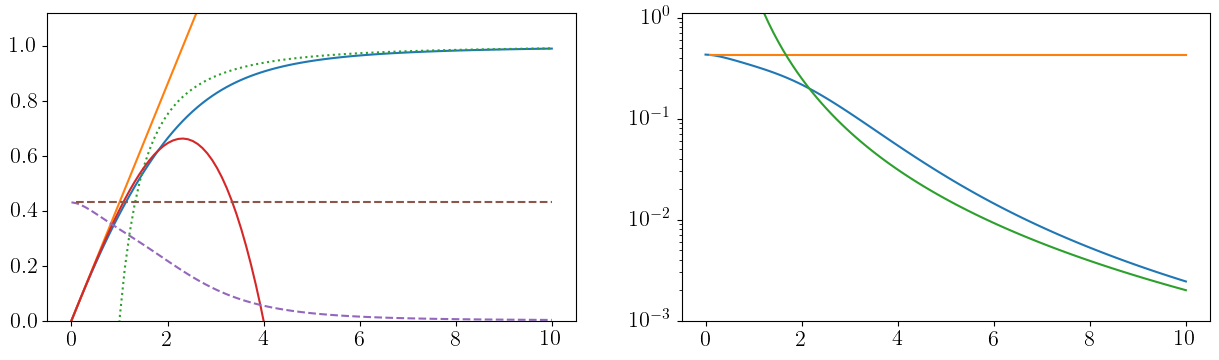

In [453]:
def co(sss):
    sss2=sss*sss
    sss4=sss2*sss2
    return (0.43*sss + 0.164*sss2 + 0.036*sss4)/(1.0+0.39*sss+0.2*sss2+0.036*sss4)
def dco(sss):
    return (331.79 + 253.086*sss - 17.0062*sss**2 + 111.111*sss**3 -  3.33333*sss**4 +  2.*sss**5)/(27.7778 + 10.8333*sss + 5.55556*sss**2 + 1.*sss**4)**2
def pco():
    sss=np.linspace(0,10,100)
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    ax[0].plot(sss,co(sss))
    ax[0].plot(sss,0.43*sss)
    ax[0].plot(sss,1-1/(sss**2),':')
    ax[0].plot(sss,0.43*(sss-sss**3/16))
#     plt.plot(sss,1-np.exp(-0.5*sss),alpha=0.5)
    ax[0].plot(sss,dco(sss),'--')
    ax[0].plot(sss,0.43*sss/sss,'--')
    ax[0].set_ylim(0,1.12)
    ax[1].semilogy(sss,dco(sss))
    ax[1].semilogy(sss,0.43*sss/sss)
    ax[1].semilogy(sss,2/sss**3)
    ax[1].set_ylim(1e-3,1.12)
    plt.show()
pco()

In [505]:
def icbs(N,cx,cy,gamma,angle=0,adv=0,p=True,msa=1.0,charge=1,r0=np.inf):

    beta=np.sqrt(1-1/gamma**2)
    al = np.arange(0, N)
    # in units of dx
    xv, yv = np.meshgrid(al, al)

    # mask
    ra = np.sqrt((xv-cx)**2+(yv-cy)**2)
    gamm=1+(gamma-1)*np.exp(-(ra/r0))
    bet =np.sqrt(1-1/gamm**2) 
  
    t = 0
    c,s=np.cos(angle),np.sin(angle)
    xp = gamm*((xv-cx)*c+(yv-cy)*s-bet*t)
    yp = (-(xv-cx)*s+(yv-cy)*c)*charge
    c,s=np.cos(adv),np.sin(adv)
    rp = xp*c-yp*s
    ip = xp*s+yp*c
    rr = np.sqrt(rp**2+ip**2)
    f  = co(rr*msa)
    g  = f/rr 
    rp *= g
    ip *= g
    
    # partial_t phi, in units of 1dx
    bg = -bet*gamm 
    gp = dco(rr*msa)*msa/rr-f/rr**2
    a1 = bg*(gp*xp**2/rr + g)
    a2 = bg*(gp*xp*yp/rr )
    vrp= a1*c-a2*s
    vip= a1*s+a2*c
    
    if p:
        q = np.arctan2(ip,rp)
        r = np.sqrt(rp**2+ip**2)
        fig, ax = plt.subplots(1,4,figsize=(15,4))
        im = ax[0].imshow(q,origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
        pa.colorbar(im)
        im = ax[1].imshow(r,origin='lower',cmap='terrain',vmin=0,vmax=1)
        pa.colorbar(im)
        # vtheta=Im(v phi*)/|phi|^2
        vtheta= (vip*rp-vrp*ip)/r**2
        im = ax[2].imshow(vtheta,origin='lower',cmap='seismic',vmin=-1,vmax=1)
        pa.colorbar(im)
        # vrho=re(v phi*)/|phi|
        vrho= (vrp*rp+vip*ip)/r
        im = ax[3].imshow(vrho,origin='lower',cmap='seismic',vmin=-1,vmax=1)
        pa.colorbar(im)
        for a in ax:
            a.set_xlim(cx-4/msa,cx+4/msa)
            a.set_ylim(cy-4/msa,cy+4/msa)
        plt.show()
    return rp,ip,vrp,vip

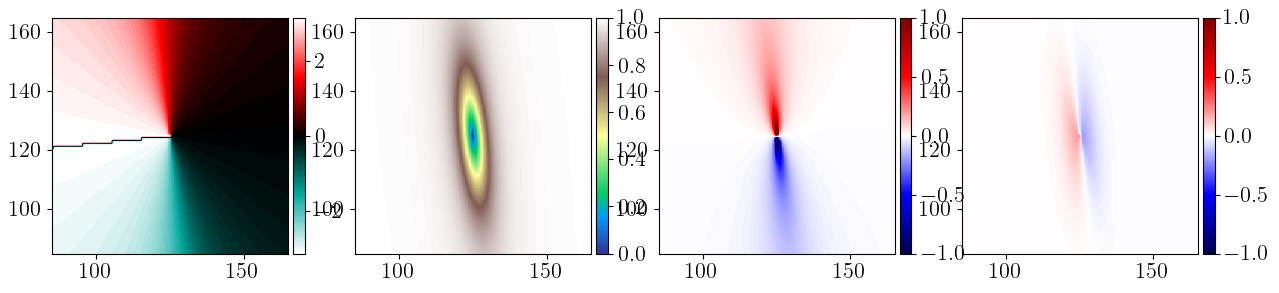

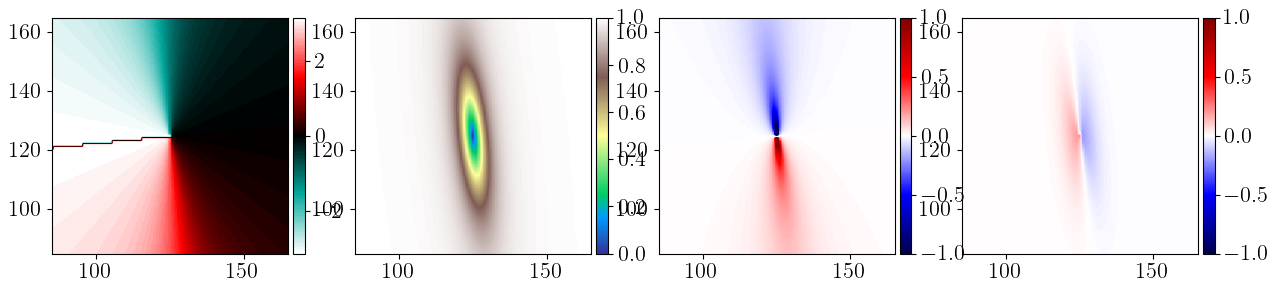

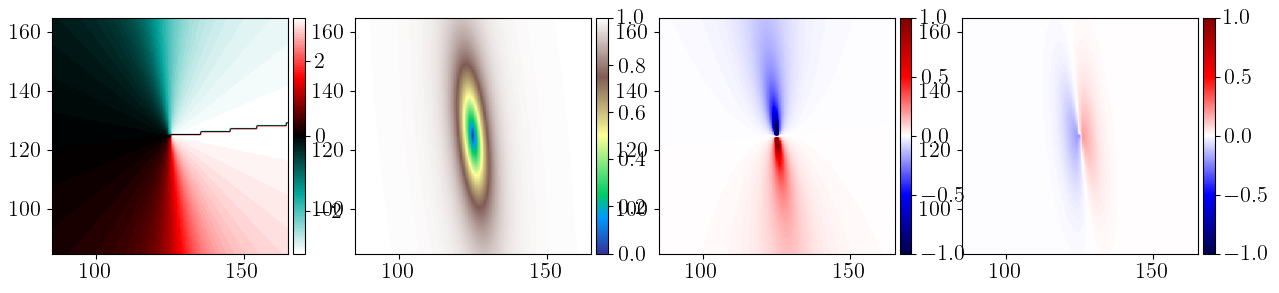

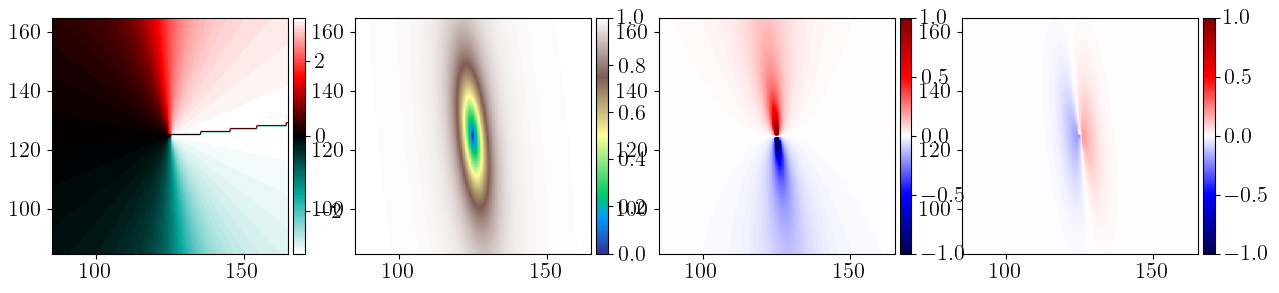

In [506]:
fields=icbs(256,125.1,125.,5,msa=.1,angle=0.1,adv=0,charge=1)
fields=icbs(256,125.1,125.,5,msa=.1,angle=0.1,adv=0,charge=-1)
fields=icbs(256,125.1,125.,5,msa=.1,angle=0.1+np.pi,adv=0,charge=1)
fields=icbs(256,125.1,125.,5,msa=.1,angle=0.1+np.pi,adv=0,charge=-1)


del fields

# several strings

In [565]:
def bsgen(N,cx_l,cy_l,gamma_l,angle_l=[0],adv_l=[0],r0_l=[np.inf],msa=1.0,charge_l=[1],p=True):
    phil=[]
    for cx,cy,gamma,angle,adv,charge,r0 in zip(cx_l,cy_l,gamma_l,angle_l,adv_l,charge_l,r0_l):
        phil.append(icbs(N,cx,cy,gamma,msa=msa,angle=angle,adv=adv,charge=charge,r0=r0,p=False))

    phir,phii,vhir,vhii = phil[0]
    vrp,vip=phir*0,phir*0
    for phi in phil[1:]:
        phir,phii = phir*phi[0]-phii*phi[1],phir*phi[1]+phii*phi[0]
    # sum vphi_i phi_i* / |phi_i|^2
    for phi in phil:
        rr = phi[0]**2+phi[1]**2
        vrp += (phi[2]*phi[0]+phi[3]*phi[1])/rr
        vip += (phi[3]*phi[0]-phi[2]*phi[1])/rr
    # vphi = phi x sum 
    vrp,vip = phir*vrp-phii*vip,phii*vrp+phir*vip
        
    
    if p:
        rp,ip=phir,phii
        q = np.arctan2(ip,rp)
        r = np.sqrt(rp**2+ip**2)
        fig, ax = plt.subplots(1,4,figsize=(15,4))
        im = ax[0].imshow(q,origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
        pa.colorbar(im)
        im = ax[1].imshow(r,origin='lower',cmap='terrain',vmin=0,vmax=1)
        pa.colorbar(im)
        # vtheta=Im(v phi*)/|phi|^2
        vtheta= (vip*rp-vrp*ip)/r**2
        im = ax[2].imshow(vtheta,origin='lower',cmap='seismic',vmin=-1,vmax=1)
        pa.colorbar(im)
#         # vrho=re(v phi*)/|phi|
        vrho= (vrp*rp+vip*ip)/r
        im = ax[3].imshow(vrho,origin='lower',cmap='seismic',vmin=-1,vmax=1)
        pa.colorbar(im)
        plt.show()
    return phir,phii,vrp,vip

In [ ]:
comb=bsgen(256,[64.00001,64.000001,128+64.000001,128+64.000001],
           [64.000001,128+64.000001,64.000001,128+64.000001],
           [1,1,1,1],angle_l=[0,0,0,0],adv_l=[0,0,0,0],
           r0_l=[np.inf,np.inf,np.inf,np.inf],
           msa=1,charge_l=[1,-1,-1,1])

In [587]:
al=np.arange(-20,22)
print(al)
l2 = len(al)**2
xv, yv = np.meshgrid(al, al)
myx = np.reshape(xv,l2)
myy = np.reshape(yv,l2)
t   = np.ones(l2)
sig = (-1)**np.abs(myx+myy)
myx = myx*128+64.5
myy = myy*128+64.5

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21]


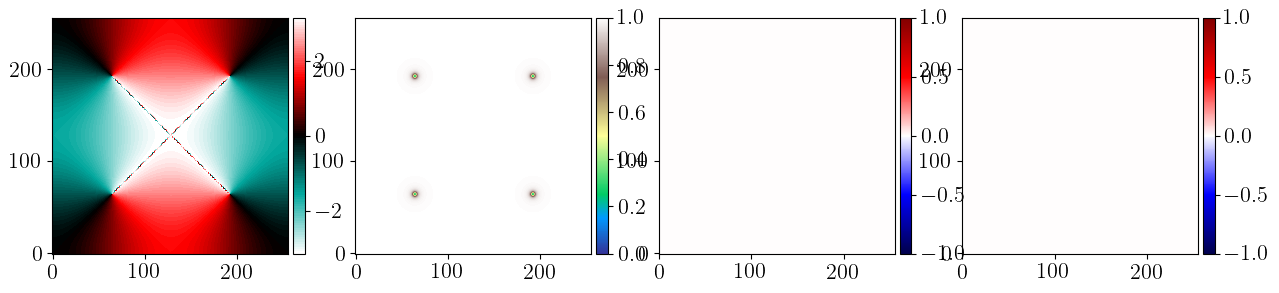

In [588]:
comb=bsgen(256,myx,
           myy,
           t,angle_l=0*t,adv_l=0*t,
           r0_l=np.inf*t,
           msa=1,charge_l=sig)

# function to open and rewrite

In [534]:
def rewritemv(fname,mr_new,mi_new,vr_new,vi_new,p=True,write=True):
    f1 = h5py.File(fname, 'r+')     # open the file
    # complex conformal field 
    m = f1['m']
    N  = f1['/'].attrs['Size']
    Nz = f1['/'].attrs['Depth']
    L  = f1['/'].attrs['Physical size']
    a = np.reshape(m,(Nz,N,N,2))
    # conformal derivative
    v = f1['v']
    b = np.reshape(m,(Nz,N,N,2))
    # Scale factor
    R = f1['/'].attrs['R']
    # Conformal time
    ct = f1['/'].attrs['z']
    # FRW parameter
    frw = f1['/'].attrs['Frw']
    # Derivative Rp = dR/dct = frw R^(frw-1)
    Rp = frw*R**(frw-1)

    print("N=%d, Nz=%d, R=%.2f, Frw=%.2f $\tau$=%.2f "%(N,Nz,R,frw,ct))



    # Current velocity is in 1/dx
    
    if write:
        if len(mr_new.shape)==3:
            # set on disk
            a[:,:,:,0] = mr_new*R
            a[:,:,:,1] = mi_new*R
            r = np.reshape(a,N*N*Nz*2)
            m[...] = r
            # conformal velocity, Phi_ct = phi_t R^2 + phi R'
            b[:,:,:,0] = vr_new*R**2+mr_new*Rp
            b[:,:,:,1] = vi_new*R**2+mi_new*Rp
            rv = np.reshape(b,N*N*Nz*2)
            v[...] = rv*N/L
        elif len(mr_new.shape)==2:
            # set on disk
            a[:,:,:,0] = mr_new[np.newaxis,:,:]*R
            a[:,:,:,1] = mi_new[np.newaxis,:,:]*R
            r = np.reshape(a,N*N*Nz*2)
            m[...] = r
            # conformal velocity, Phi_ct = phi_t R^2 + phi R'
            b[:,:,:,0] = vr_new[np.newaxis,:,:]*R**2+mr_new[np.newaxis,:,:]*Rp
            b[:,:,:,1] = vi_new[np.newaxis,:,:]*R**2+mi_new[np.newaxis,:,:]*Rp
            rv = np.reshape(b,N*N*Nz*2)
            v[...] = rv*N/L

    if p:
        q = np.arctan2(a[:,:,:,1],a[:,:,:,0])
        sz,sy,sx=Nz//2,N//2,N//2
        fig, ax = plt.subplots(2,3,figsize=(15,4))
        im = ax[0,0].imshow(q[sz,:,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
        pa.colorbar(im)
        im = ax[0,1].imshow(q[:,sy,:],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
        pa.colorbar(im)
        im = ax[0,2].imshow(q[:,:,sx],origin='lower',cmap=pa.thetacmap,vmin=-np.pi,vmax=np.pi)
        pa.colorbar(im)
        vtheta= (b[:,:,:,1]*a[:,:,:,0]-b[:,:,:,0]*a[:,:,:,1])/(a[:,:,:,1]**2+a[:,:,:,0])
        s_v,l = vtheta.std(),5
        print(s_v)
        im = ax[1,0].imshow(vtheta[sz,:,:],origin='lower',cmap='seismic',vmin=-l*s_v,vmax=l*s_v)
        pa.colorbar(im)
        im = ax[1,1].imshow(vtheta[:,sy,:],origin='lower',cmap='seismic',vmin=-l*s_v,vmax=l*s_v)
        pa.colorbar(im)
        im = ax[1,2].imshow(vtheta[:,:,sx],origin='lower',cmap='seismic',vmin=-l*s_v,vmax=l*s_v)
        pa.colorbar(im)
        
    f1.close()
    

N=256, Nz=4, R=1.00, Frw=0.00 $	au$=0.50 
0.0
N=256, Nz=4, R=1.00, Frw=0.00 $	au$=0.50 
0.0


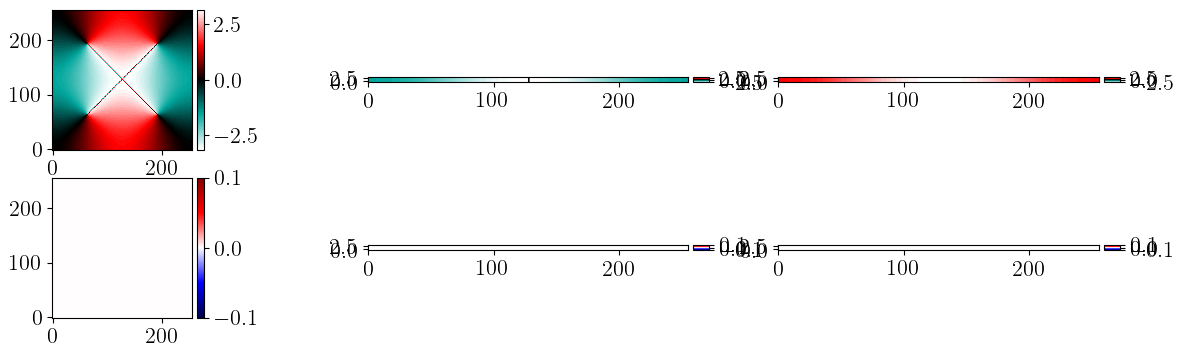

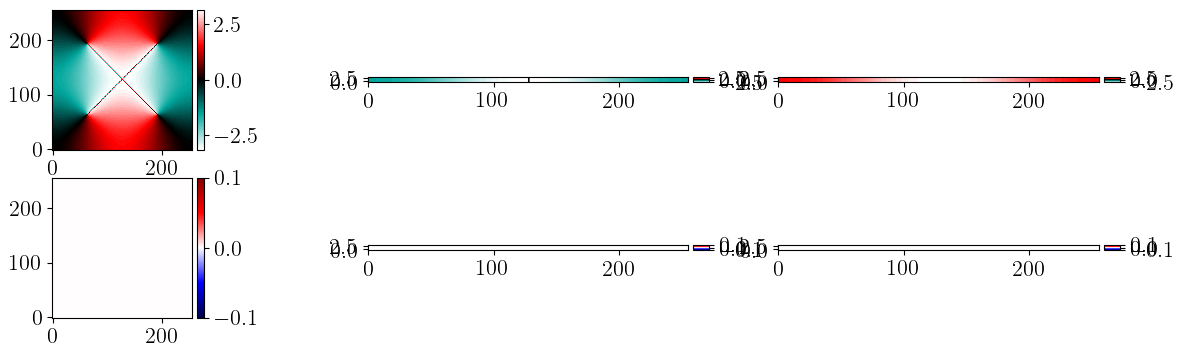

In [582]:
rewritemv('out/m/axion.00000',comb[0],comb[1],comb[2],comb[3],p=True)
rewritemv('out/m/axion.00000',comb[0],comb[1],comb[2],comb[3],p=True,write=False)